# Page View Time Series Visualizer (FreeCodeCamp - Data Analysis with python #4)

For this project you will visualize time series data using a line chart, bar chart, and box plots. You will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth.

Use the data to complete the following tasks:

    1) Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the date column.
    
    2) Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
    
    3) Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views.
    
    4) Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.
    
    5) Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.

For each chart, make sure to use a copy of the data frame.

The boilerplate also includes commands to save and return the image.

In [1]:
# --- Import des dataframes ---

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
# 1) Use pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the date column.

df = pd.read_csv('fcc-forum-pageviews.csv',parse_dates=['date'], index_col = 'date')

In [3]:
# 2) Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

df = df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]

In [4]:
# 3) Create a draw_line_plot...

def draw_line_plot():
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.plot(df.index, df['value'], color='red', linewidth=1)

    
    ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    ax.set_xlabel("Date")
    ax.set_ylabel("Page Views")

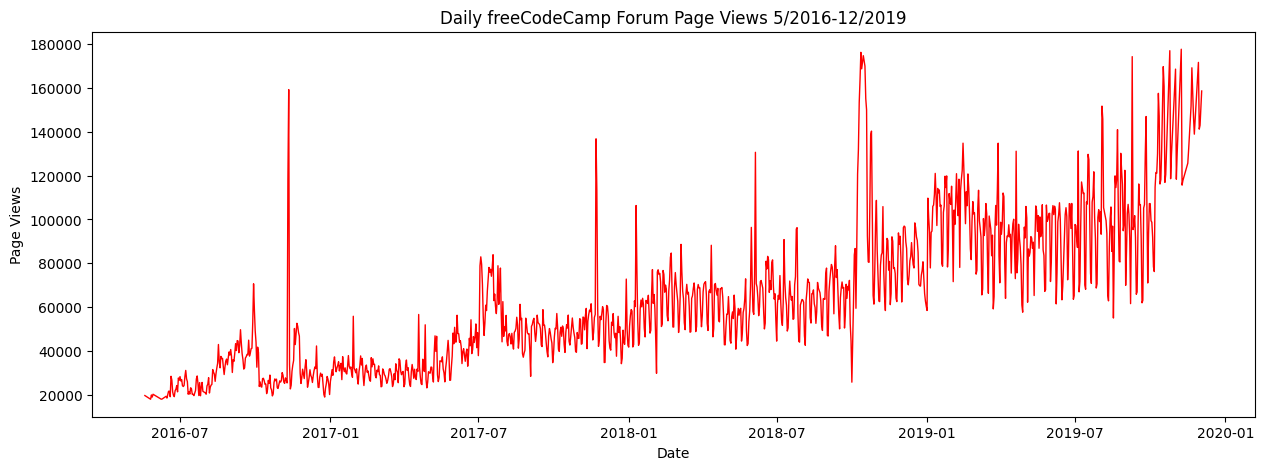

In [5]:
draw_line_plot()

In [6]:
# 4) Create a bar_plot...

def draw_bar_plot():
    # Extraction des colonnes 'year' et 'month'
    df['year'] = df.index.year
    df['month'] = df.index.month_name()

    # Calcul de la moyenne des valeurs par année et mois
    df_bar = df.groupby(['year', 'month'])['value'].mean().unstack()

    # Réorganisation des mois dans l'ordre
    month_order = ['January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December']
    
    df_bar = df_bar[month_order]

    # Création du graphique
    fig = df_bar.plot(kind='bar', figsize=(12, 8)).figure

    # Ajout titres et légende
    plt.xlabel("Years")
    plt.ylabel("Average Page Views")
    plt.legend(title="Months")
    plt.tight_layout()

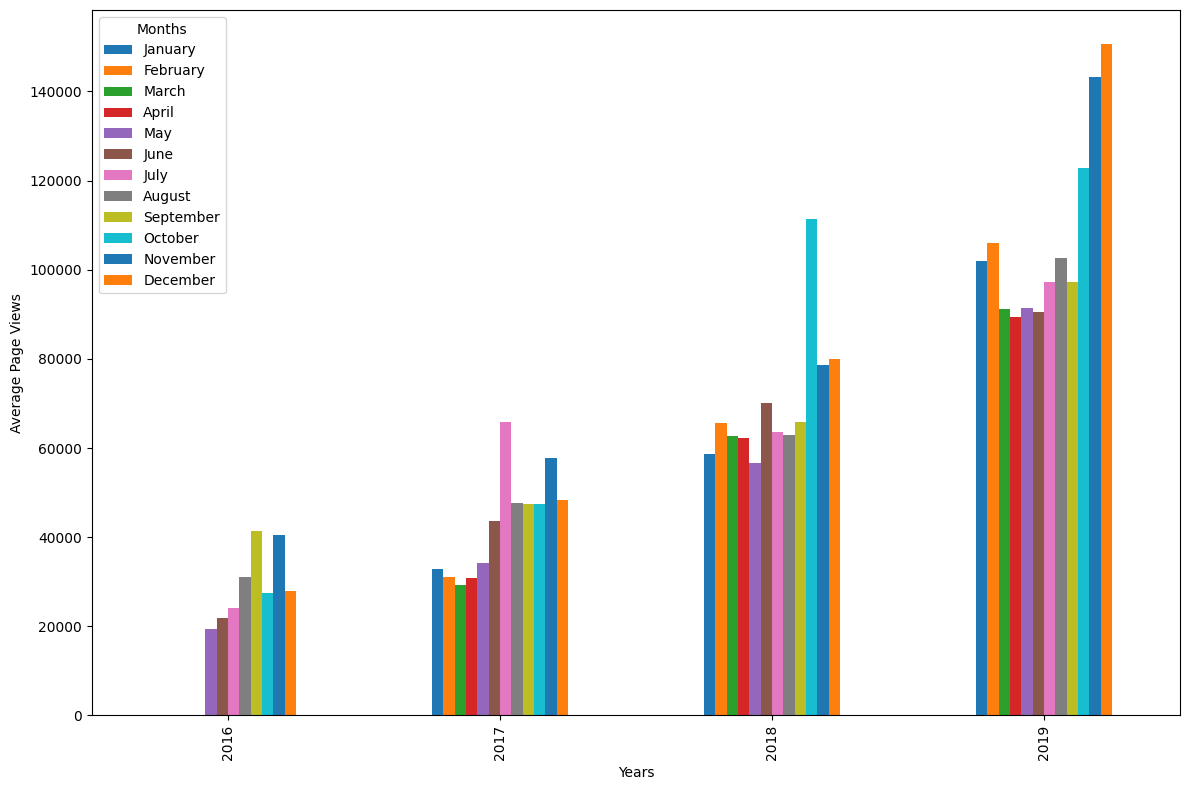

In [7]:
draw_bar_plot()

In [8]:
# 5) Create box_plot ...

def draw_box_plot():

    # Préparer les colonnes nécessaires pour les boxplots
    df_box = df.copy()
    df_box.reset_index(inplace=True)  # remettre 'date' en colonne
    df_box['year'] = df_box['date'].dt.year
    df_box['month'] = df_box['date'].dt.strftime('%b')  # format abrégé: Jan, Feb...
    df_box['month_num'] = df_box['date'].dt.month

    # Trier les mois dans l'ordre correct (Jan -> Dec)
    df_box = df_box.sort_values('month_num')

    # Créer la figure
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Boxplot par année (Trend)
    sns.boxplot(x='year', y='value', data=df_box, ax=axes[0])
    axes[0].set_title("Year-wise Box Plot (Trend)")
    axes[0].set_xlabel("Year")
    axes[0].set_ylabel("Page Views")

    # Boxplot par mois (Seasonality)
    sns.boxplot(x='month', y='value', data=df_box, ax=axes[1],
                order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    axes[1].set_title("Month-wise Box Plot (Seasonality)")
    axes[1].set_xlabel("Month")
    axes[1].set_ylabel("Page Views")

    plt.tight_layout()

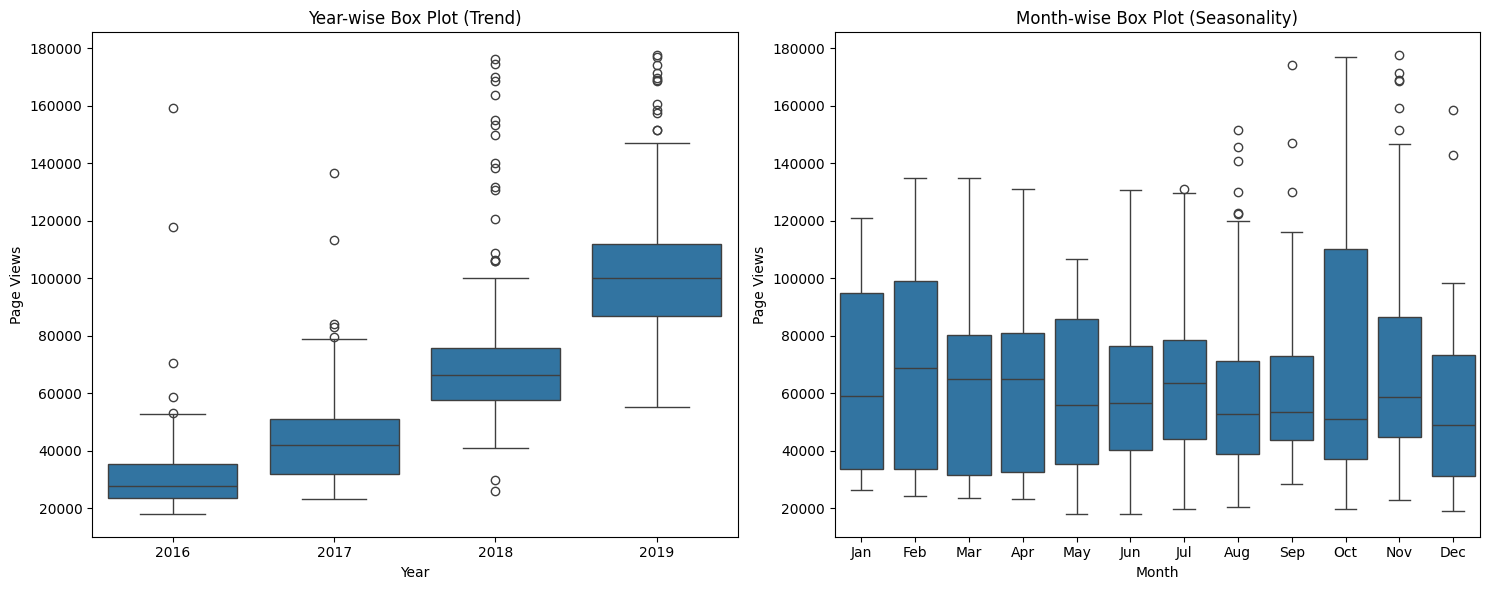

In [9]:
draw_box_plot()